### Libraries

In [1]:
import sys
sys.path.append('../python-scripts')
from decision_tree_classifier import *

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

### Data

In [5]:
iris = datasets.load_iris()

In [6]:
iris.data.shape

(150, 4)

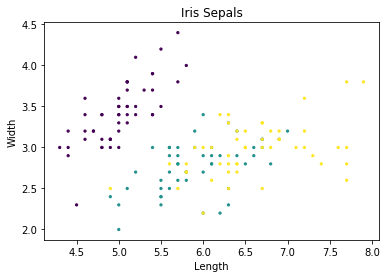

In [7]:
f0 = iris.data[:,0]
f1 = iris.data[:,1]
plt.scatter(f0, f1, c=iris.target, s=5)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris Sepals');

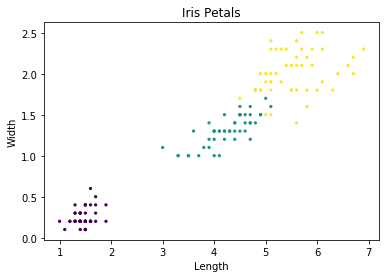

In [8]:
f2 = iris.data[:,2]
f3 = iris.data[:,3]
plt.scatter(f2, f3, c=iris.target, s=5)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris Petals');

### Decision Trees

In [9]:
data = data_to_dict(iris.data, iris.target)

In [10]:
best_feature(data)

labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
probs:  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
labels:  []
probs:  []
labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
probs:  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
labels:  [0]
probs:  [1.0]
labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 

labels:  [1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
probs:  [0.021739130434782608, 0.9782608695652174]
labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
probs:  [0.43103448275862066, 0.43103448275862066, 0.13793103448275862]
labels:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
probs:  [1.0]
labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2]
probs:  [0.4132231404958678, 0.4132231404958678, 0.17355371900826447]
labels:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
probs:  [1.0]
labels:  [0 0 0 0 0 0 0 0

(0.9182958340544894, 'feature2', 3.0)